Elijah Burns, Phys 434, Lab 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

**Lab #2: Probability, Distributions, and Statistical Questions**

**Problem 1
In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.**

**To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).**

**A) Show how the probability distribution of the background changes as you integrate (sum) for more days.**

**B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.**

**C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.**

**D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]**

Assume average cosmic-ray background is 2 per day.
Assume average number of gamma rays from source is 4 per day.
mu = 2
y=4

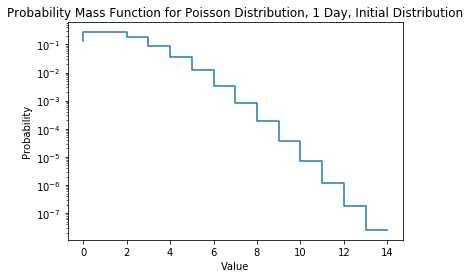

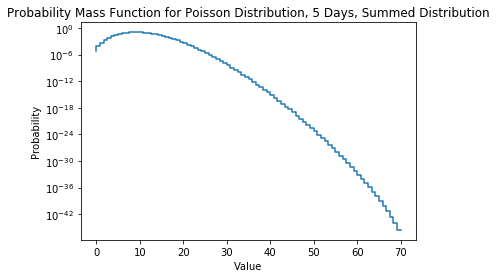

In [2]:
#Problem 1, Part A
xlow = 0
xhigh = 14
xspace = 15
x = np.linspace(xlow,xhigh,xspace)

pois_dist = scipy.stats.poisson.pmf(x,mu=2, loc=0)
pois_dist = pois_dist/sum(pois_dist)
comb = pois_dist

k=5
for i in range(k):
    comb = np.convolve(comb,pois_dist)
    

plt.step(x,pois_dist)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Mass Function for Poisson Distribution, 1 Day, Initial Distribution')
plt.show()

cx = np.linspace(xlow*k,xhigh*k,len(comb))
plt.step(cx,comb)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Mass Function for Poisson Distribution, 5 Days, Summed Distribution')
plt.show()

Part A Answer:<br/>
As we sum for more days, the probability mass function width increases, and moves the peak of the function to the right.
Part B Answer:
The second plot above shows the pmf for the Poisson distribution after 5 days. We can see mathematically that it remains a Poisson distribution because the only manipulation done to it was convoluting the original distribution with itself 5 times, which essentially shifts the peak. The original peak was at 2, the shifted peak after 5 days should be 2*5=10, and the second chart confirms this. However, it still looks Poissonian because by summing over 5 days, that isn't very many days, and so the peak hasn't shifted significantly. If we were to sum over a larger amount of days, we would see the distribution approach a Gaussian shape.

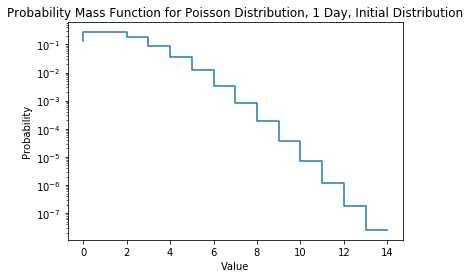

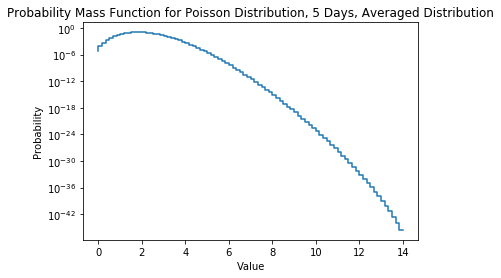

In [3]:
#Problem 1 Part C

plt.step(x,pois_dist)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Mass Function for Poisson Distribution, 1 Day, Initial Distribution')
plt.show()


pois_dist = scipy.stats.poisson.pmf(x,mu=2, loc=0)
pois_dist = pois_dist/sum(pois_dist)
comb = pois_dist

k=5
for i in range(k):
    comb = np.convolve(comb,pois_dist)
    
cx = np.linspace(xlow,xhigh,len(comb))
plt.step(cx,comb)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Mass Function for Poisson Distribution, 5 Days, Averaged Distribution')
plt.show()

Part C Answer:<br/> As you average over more and more days, the width of the distribution decreases because when you average all the distributions from many days, the probability of getting measurements far from the mean decreases. The peak, however, remains in the same place as the initial distribution. When comparing the average distribution to the sum distribution we see the average distribution converges to a Gaussian distribution faster than the sum. It takes roughly 500 days for the average to converge, and roughly 1200 for the sum to converge. When we compare this to the Central Limit Theorem, both cases reaffirm the CLT because as you increase the number of days, both the sum and average distributions move toward a Gaussian distribution, but the average does this faster than the sum for this particular Poisson distribution.

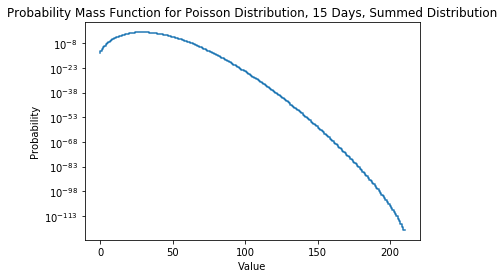

Probability:  4.4846402180720446e-07
Sigma:  4.913001032616748


In [4]:
#Problem 1 Part D
#Assume N=15, 15 days
#Probability of receiving a signal of 135 or greater after 15 days.

xlow = 0
xhigh = 14
xspace = 15
x = np.linspace(xlow,xhigh,xspace)

pois_dist = scipy.stats.poisson.pmf(x,mu=2, loc=0)
pois_dist = pois_dist/sum(pois_dist)
comb = pois_dist

k=15
for i in range(k):
    comb = np.convolve(comb,pois_dist)
cx = np.linspace(xlow*k,xhigh*k,len(comb))
plt.step(cx,comb)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Mass Function for Poisson Distribution, 15 Days, Summed Distribution')
plt.show()

prob = stats.poisson.cdf(k=60, mu=30)
print('Probability: ',1-prob)

sig = stats.norm.ppf(prob)
print('Sigma: ',sig)

Part D Answer:<br/>The sigma value for receiving a signal greater than Y * N (4 * 15=60), or receiving a signal of 60 or greater after 15 days, is extremely unlikely and so the sigma value is very close to 5. This can be seen on the probability mass function just above because you can see by the scale on the y-axis that the probability of getting values over 50 becomes very small very quickly. So when you integrate from 60 to infinity on the graph above, the resulting probability is indeed quite miniscule, and the resulting sigma is about 5. 

**Problem 2
Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.**

**A) Show how the distribution changes as you average over more observing intervals.**

**B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?**

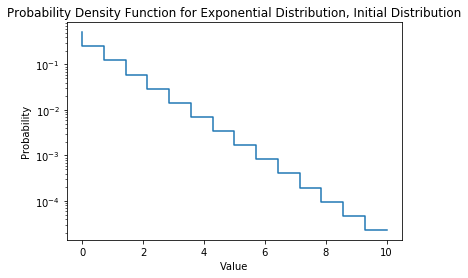

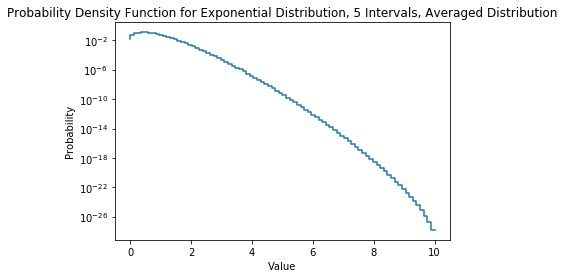

/opt/conda/lib/python3.7/site-packages/matplotlib/ticker.py:1123: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)


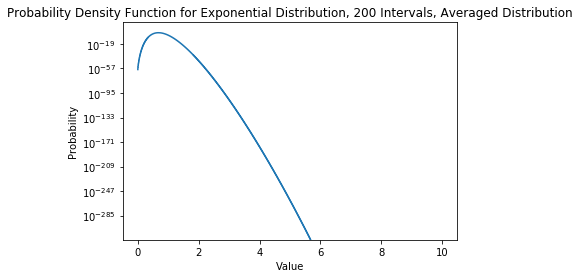

In [5]:
#Problem 2 Part A
#I will look at an exponential distribution

xlow = 0
xhigh = 10
xspace = 15

x = np.linspace(xlow,xhigh,xspace)

expo_dist = stats.expon.pdf(x,loc=0)
expo_dist = expo_dist/sum(expo_dist)
comb = expo_dist

plt.step(x,expo_dist)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Density Function for Exponential Distribution, Initial Distribution')
plt.show()
k=5
for i in range(k):
    comb = np.convolve(comb,expo_dist)
    
cx = np.linspace(xlow,xhigh,len(comb))
plt.step(cx,comb)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Density Function for Exponential Distribution, 5 Intervals, Averaged Distribution')
plt.show()

j = 200
comb = expo_dist
for i in range(j):
    comb = np.convolve(comb,expo_dist)
cx = np.linspace(xlow,xhigh,len(comb))
plt.step(cx,comb)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Density Function for Exponential Distribution, 200 Intervals, Averaged Distribution')
plt.show()

Part A Answer:<br/>You can see that as you average over more intervals, from 1, to 5, to 200, the shape of the probability density function does approach that of a Gaussian. After 200 intervals, it is still not very good, but if you compare the shape to that of 5 intervals, you can see how much it has changed, and that the width indeed decreases, and starts 'bending' toward a Gaussian shape.

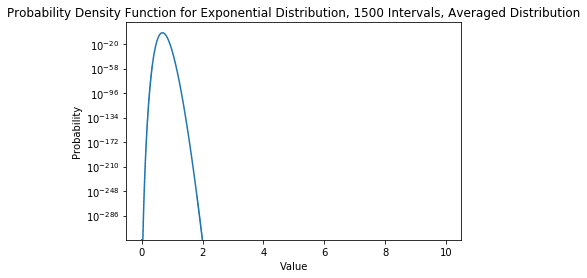

In [6]:
xlow = 0
xhigh = 10
xspace = 15

x = np.linspace(xlow,xhigh,xspace)

expo_dist = stats.expon.pdf(x,loc=0)
expo_dist = expo_dist/sum(expo_dist)
comb = expo_dist
k=1500
for i in range(k):
    comb = np.convolve(comb,expo_dist)
    
cx = np.linspace(xlow,xhigh,len(comb))
plt.step(cx,comb)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Density Function for Exponential Distribution, 1500 Intervals, Averaged Distribution')
plt.show()

Part B Answer:<br/> The shape of the exponential distribution does indeed change after averaging over many trials. When comparing the averaged distributions to that of the original, it is clear that the distribution eventually bends toward a Gaussian distribution. For this particular exponential function, it took about 1500 trials to get something that really looked Gaussian.

**Problem 3
The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years (wikipedia, scientific paper), and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.**

**We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.**

**Version 1
You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.**

**A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?**

**Version 2
You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.**

**B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)**

**C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.**

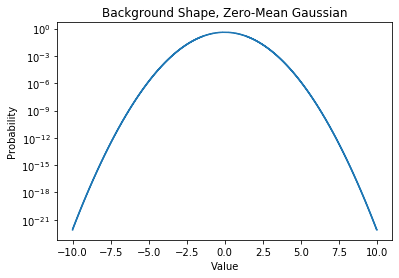

Probability of background producing a signal of 1.75 or greater: 0.040059156863817114
Sigma associated with above probability 1.7499999999999996


In [7]:
#Problem 3 Part A
#Assume width of background distribution, X, equals +-10
#Assume signal strength, Y, equals 1.75
#Statistical Question: What is the probability of the background giving off a signal of 1.75 or greater?

xlow = -10
xhigh = 10
xspace = 1000

x = np.linspace(xlow,xhigh,xspace)

gaus_dist = stats.norm.pdf(x,loc=0,scale=1)

plt.step(x,gaus_dist)
plt.yscale('log')
plt.title('Background Shape, Zero-Mean Gaussian')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

prob = stats.norm.cdf(.0175e2)
print('Probability of background producing a signal of 1.75 or greater:',1-prob)

sig = stats.norm.ppf(prob)
print('Sigma associated with above probability',sig)

Part A Answer:<br/> This is not a significant discovery because the sigma value from a signal of .0175e2 is only 1.75, which does not meet the threshold to be considered significant, which would be a sigma value of 5 or more.

Problem 3 Part B: <br/>
The new pdf is produced by multiplying the y values of the original pdf by the number of trials we must perform. In this case, that number is 10,000 trials. The integral of the resulting pdf will tell us the number of events we expect to find in the range we integrate over.
<br/>
Statistical Question: If we look at 10000 pixels, how many *times* should we expect to see a signal of 1.75 or greater? 

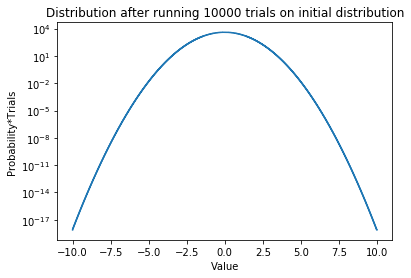

In [8]:
#Problem 3 Part B
full_dist = gaus_dist*10000
plt.step(x,full_dist)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability*Trials')
plt.title('Distribution after running 10000 trials on initial distribution')
plt.show()

As we can see from the graph above, the width of the original distribution did not change after running 10000 trials, however the values on the y-axis did. This means that after running N number of trials, the values on the y no longer represent the probability of the background producing a value, instead the represent the probability of that value being produced multiplied by the number of trials that have been performed on the original distribution.

In [9]:
#Problem 3 Part C
trials = 10000
trial_prob = (stats.norm.cdf(.0175e2))*trials
print('Number of events expected in signal region of trial pdf distribution',trials-trial_prob)

trial_sig = stats.norm.ppf(trial_prob/trials)
print('Significance of this result',trial_sig)
print('This value is less than 5 sigma, so this discovery cannot be considered significant')

Number of events expected in signal region of trial pdf distribution 400.59156863817043
Significance of this result 1.7500000000000013
This value is less than 5 sigma, so this discovery cannot be considered significant


The significance of the detection from the new pdf from the trials still does not meet the 5 sigma threshold to be considered a significant discovery.

**Problem 4
The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.**

**Let us again assume we have a Gaussian background (same parameters as Problem 3).**

**A) Calculate the signal required for a 5-sigma detection in Version 1**

**B) Calculate the signal required for a 5-sigma detection in Version 2**

**C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.**

**D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?**

**Extra credit: If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.**

In [10]:
#Problem 4, Part A
prob5sig = 1/(3.5e6)

detect = stats.norm.ppf(1-prob5sig)
print('Signal required to produce a 5-sigma detection described by Version 1:',detect)

Signal required to produce a 5-sigma detection described by Version 1: 5.000631434930381


In [11]:
#Problem 4, Part B
trials = 10000
detect_trials = stats.norm.ppf(1-prob5sig/trials)

print('Signal required to produce a 5-sigma detection described by Version 2:',detect_trials)

Signal required to produce a 5-sigma detection described by Version 2: 6.551026394051586


Part C Answer: <br/>
If you have a trials factor of 10000, the signal would have to be 1.31 times brighter in order to be considered a significant discovery. <br/>
The sensitivity penalty for a trials factor of 10k is so low in these particular distributions because the probability of the background producing a signal greater than 1 was already so low in the initial distribution, so when the number of trials was increased, it did not have a significant effect on the new probability distribution. We can see the probability of seeing a signal of, say, 5 in the initial distribution was around 10e-9, so the probability of seeing that signal in the distribution after 10000 trials was 10e-5. Due to this, we can see the change in probability is incredible tiny when comparing 1 trial to 10000 trials, and so the sensitivity penalty of the trial factor is not very severe for these distributions.

Part D Answer:<br/>
As you increase the magnitude of the trials factor by 10, the 5 sigma threshold it produces increases by between .3-.4 signal strength each time. So for example, if we increase the trials factor from 10,000 to 100,000, the 5-sigma signal value goes from 6.55 to 6.89. So the signal needs to increase in strength by roughly .3 to .4 for each increase in trial factor by a factor of 10.